## The Simplest Example
Can definitely build off of this for what we are doing

===> Domain:  --> room:
    dimensions: [0.0,40.0]x[0.0,30.0]
    width: 400 height: 300
    background image: room.png
    image of the domain: room_domain.png
    wall_colors: [[0, 0, 0]]
    destinations: {'door': <cromosim.domain.Destination object at 0xffff608b5ea0>}


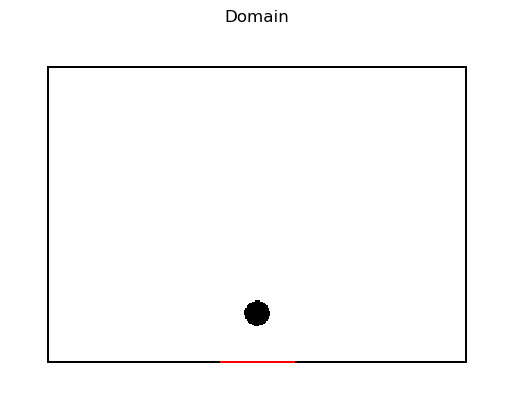

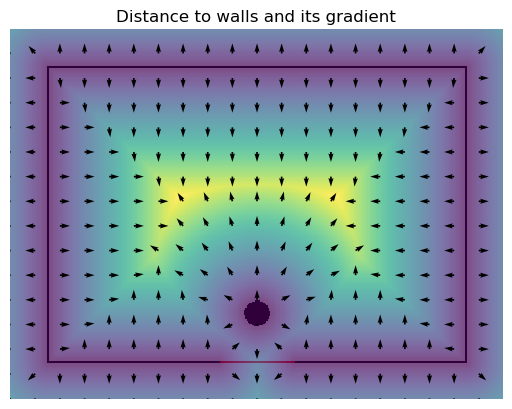

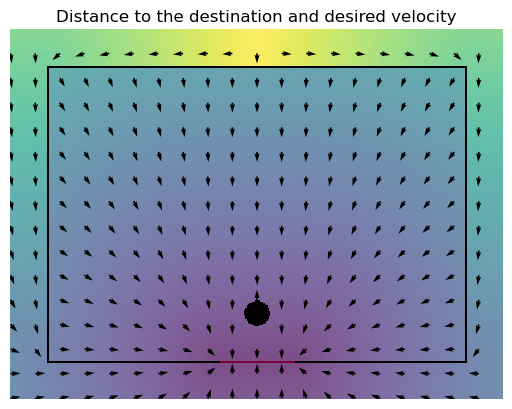

In [1]:
# Authors:
#     Sylvain Faure <sylvain.faure@universite-paris-saclay.fr>
#     Bertrand Maury <bertrand.maury@universite-paris-saclay.fr>
#
#     cromosim/examples/domain/domain_room.py
#
#     python domain_room.py
#
# License: GPL

"""
This script allows you to create a very simple domain: a room with a single door.
The layout of the room is given by the image "room.png". Then we add a
door using a red line (Line2D object from Matplotlib) and an obstacle using a
black circle (Circle object from Matplotlib).
"""

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

from cromosim.domain import Domain
from cromosim.domain import Destination

# To create a Domain object from a background image
dom = Domain(name='room', background='room.png', pixel_size=0.1)

# To define the color for the walls
wall_color = [0, 0, 0]

# To add an obstacle using a matplotlib shape colored with wall_color :
#     Circle( (center_x,center_y), radius )
circle = Circle((20.0, 7.0), 1.0)
dom.add_shape(circle, outline_color=wall_color, fill_color=wall_color)

# To define the color for the issue of the room
door_color = [255, 0, 0]

# To add a door using a matplotlib shape :
#     Line2D(xdata, ydata, linewidth)
line = Line2D([17.0, 23.0], [3.1, 3.1], linewidth=2)
dom.add_shape(line, outline_color=door_color, fill_color=door_color)

# To build the domain :
dom.build_domain()

# To plot the domain : backgroud + added shapes
dom.plot(id=1, title="Domain")

# To create a Destination object towards the door
dest = Destination(name='door', colors=[door_color],
                   excluded_colors=[wall_color])
dom.add_destination(dest)

# To plot the wall distance and its gradient
dom.plot_wall_dist(id=2, step=20,
                   title="Distance to walls and its gradient",
                   savefig=False, filename="room_wall_distance.png")

# To plot the distance to the red door and the correspondant
# desired velocity
dom.plot_desired_velocity('door', id=3, step=20,
                          title="Distance to the destination and desired velocity",
                          savefig=False, filename="room_desired_velocity.png")

print("===> Domain: ", dom)

plt.show()

## A Circular Domain
May be good for forcing direction?

===> Domain:  --> stadium:
    dimensions: [0.0,147.8]x[0.0,104.30000000000001]
    width: 1478 height: 1043
    background image: stadium.png
    image of the domain: stadium_domain.png
    wall_colors: [[0, 0, 0]]
    destinations: {'running_track': <cromosim.domain.Destination object at 0xffff5e4bbdc0>}


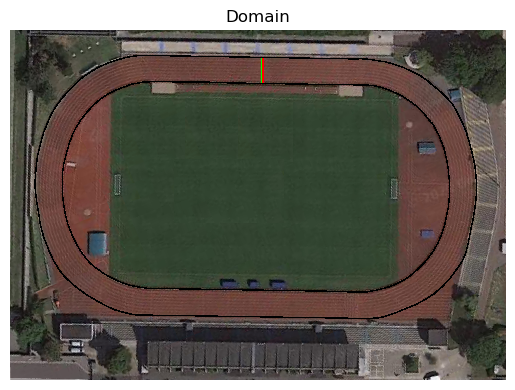

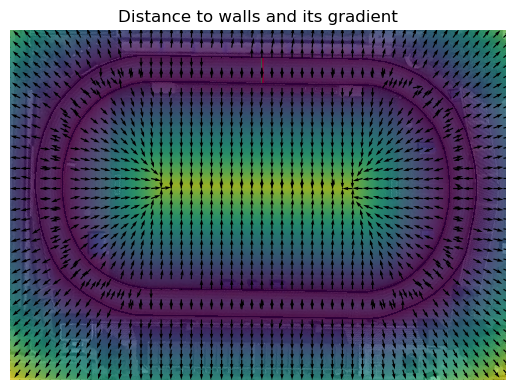

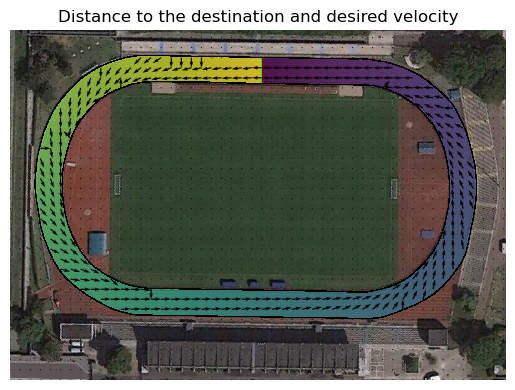

In [2]:
# Authors:
#     Sylvain Faure <sylvain.faure@universite-paris-saclay.fr>
#     Bertrand Maury <bertrand.maury@universite-paris-saclay.fr>
#
#     cromosim/examples/domain/domain_stadium.py
#
#     python domain_stadium.py
#
# License: GPL

"""
This script allows to make a circular domain, here an athletics track
around a stadium.
"""

# To create a Domain object from a background image
# By default the black color is for the walls
dom = Domain(name='stadium', pixel_size=0.1, background="stadium.png")

# To build the domain :
dom.build_domain()

# To plot the domain : backgroud + added shapes (none here, they were added
# directly to the drawing using drawing software)
dom.plot(id=1, title="Domain")

# To create a Destination object towards the red line
# Since the domain is circular here, we want people to go to the red line
# and then cross it and continue to turn. For this, the color green is used
# to block one side of the track when calculating the desired velocity (as a
# temporary wall will do). Once this calculation is done, the desired speed
# is imposed at [-1,0] on the red and green pixels..
dest = Destination(name='running_track',
                   colors=[[255, 0, 0]],
                   excluded_colors=[[0, 0, 0], [0, 255, 0]],
                   desired_velocity_from_color=[[255, 0, 0, -1, 0], [0, 255, 0, -1, 0]])
dom.add_destination(dest)

# To plot the wall distance and its gradient
dom.plot_wall_dist(id=2, step=30,
                   title="Distance to walls and its gradient",
                   savefig=False, filename="stadium_wall_distance.png")

# To plot the distance to the red line and the correspondant desired velocity
dom.plot_desired_velocity('running_track', id=3, step=30,
                          title="Distance to the destination and desired velocity",
                          savefig=False, filename="stadium_desired_velocity.png")

print("===> Domain: ", dom)

plt.show()

## Several Destinations
Will definitely be useful for us since most lecture halls have more than 1 exit.

===> Domain:  --> shibuya_crossing:
    dimensions: [0.0,83.49000000000001]x[0.0,58.476000000000006]
    width: 2530 height: 1772
    background image: shibuya_crossing.png
    image of the domain: shibuya_crossing_domain.png
    wall_colors: [[0, 0, 0], [148, 33, 146]]
    destinations: {'blue': <cromosim.domain.Destination object at 0xffff605bc970>, 'brown': <cromosim.domain.Destination object at 0xffff5e3f9bd0>, 'cyan': <cromosim.domain.Destination object at 0xffff5e3f9ae0>, 'green': <cromosim.domain.Destination object at 0xffff5e3f82e0>, 'pink': <cromosim.domain.Destination object at 0xffff60570d90>}


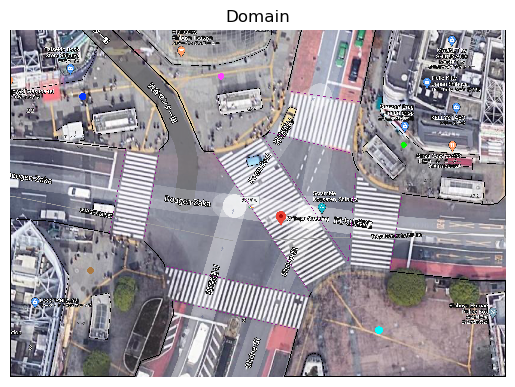

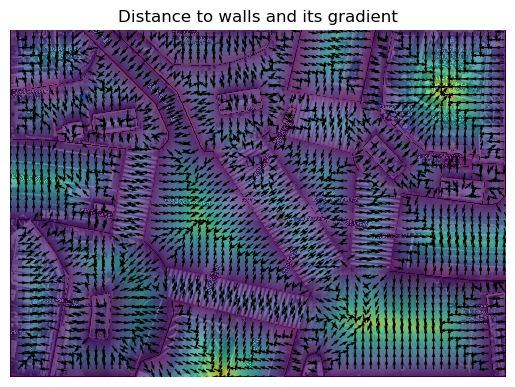

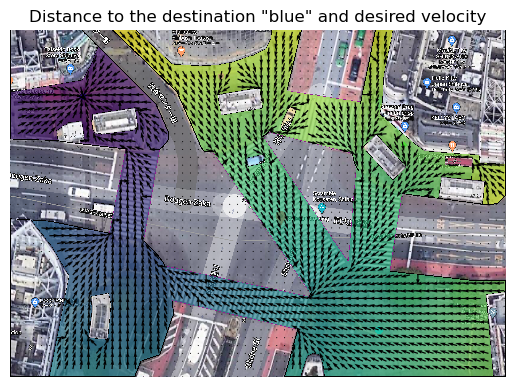

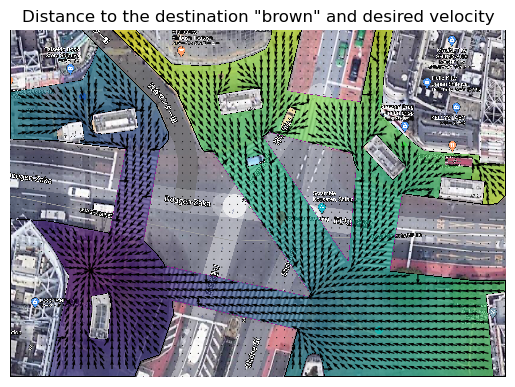

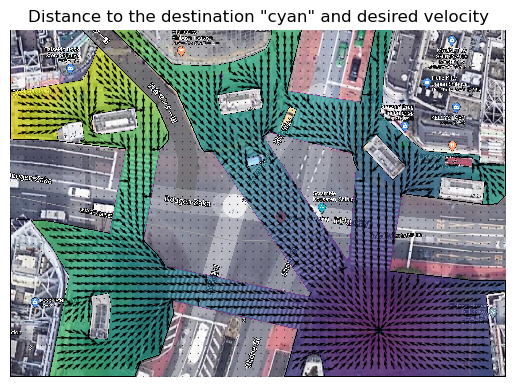

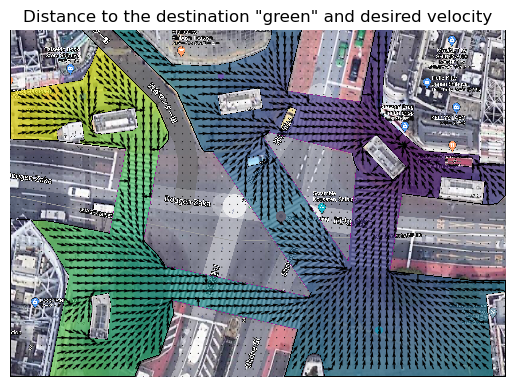

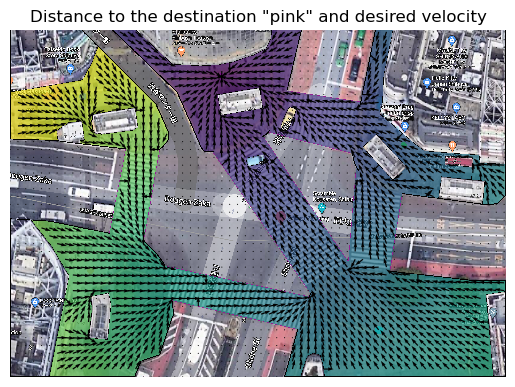

In [3]:
# Authors:
#     Sylvain Faure <sylvain.faure@universite-paris-saclay.fr>
#     Bertrand Maury <bertrand.maury@universite-paris-saclay.fr>
#
#     cromosim/examples/domain/domain_shibuya_crossing.py
#
#     python domain_shibuya_crossing.py
#
# License: GPL

"""
This script allows you to make a domain with multiple destinations.
"""

# The walls are represented here by the black and magenta colors
black = [0, 0, 0]
magenta = [148, 33, 146]
wall_colors = [black, magenta]

# To create a Domain object from a background image
dom = Domain(name='shibuya_crossing',
             pixel_size=0.033,
             background="shibuya_crossing.png",
             wall_colors=wall_colors)

# To build the domain :
dom.build_domain()

# To plot the domain
dom.plot(id=1, title="Domain")

# To define all the destinations

# --> towards the blue disk
blue = [4, 51, 255]
dest_blue = Destination(name='blue', colors=[blue], excluded_colors=wall_colors)
dom.add_destination(dest_blue)

# --> towards the brown disk
brown = [170, 121, 66]
dest_brown = Destination(name='brown', colors=[brown],
                         excluded_colors=wall_colors)
dom.add_destination(dest_brown)

# --> towards the cyan disk
cyan = [0, 253, 255]
dest_cyan = Destination(name='cyan', colors=[cyan],
                        excluded_colors=wall_colors)
dom.add_destination(dest_cyan)

# --> towards the green disk
green = [0, 249, 0]
dest_green = Destination(name='green', colors=[green],
                         excluded_colors=wall_colors)
dom.add_destination(dest_green)

# --> towards the pink disk
pink = [255, 64, 255]
dest_pink = Destination(name='pink', colors=[pink],
                        excluded_colors=wall_colors)
dom.add_destination(dest_pink)

print("===> Domain: ", dom)

# To plot the wall distance and its gradient
dom.plot_wall_dist(id=3, step=40,
                   title="Distance to walls and its gradient",
                   savefig=False, filename="shibuya_crossing_wall_distance.png")

# To plot all the desired velocity fields
dom.plot_desired_velocity('blue', id=4, step=40,
                          title='Distance to the destination "blue" and desired velocity',
                          savefig=False, filename="shibuya_crossing_blue.png")

dom.plot_desired_velocity('brown', id=5, step=40,
                          title='Distance to the destination "brown" and desired velocity',
                          savefig=False, filename="shibuya_crossing_brown.png")

dom.plot_desired_velocity('cyan', id=6, step=40,
                          title='Distance to the destination "cyan" and desired velocity',
                          savefig=False, filename="shibuya_crossing_cyan.png")

dom.plot_desired_velocity('green', id=7, step=40,
                          title='Distance to the destination "green" and desired velocity',
                          savefig=False, filename="shibuya_crossing_green.png")

dom.plot_desired_velocity('pink', id=8, step=40,
                          title='Distance to the destination "pink" and desired velocity',
                          savefig=False, filename="shibuya_crossing_pink.png")

plt.show()

## Build domain from json file
Lock in and pay attention here because this is important for running simulations!

## Create your own Domain!
Also createa  json file for it once you're done hammering out the details so you can run it in the social force model

===> Domain:  --> MC254-hall:
    dimensions: [0.0,22.666666666666668]x[0.0,16.0]
    width: 1156 height: 816
    background image: MC254-hall.png
    image of the domain: MC254-hall_domain.png
    wall_colors: [[0, 0, 0]]
    destinations: {'door': <cromosim.domain.Destination object at 0xffff5e427cd0>}


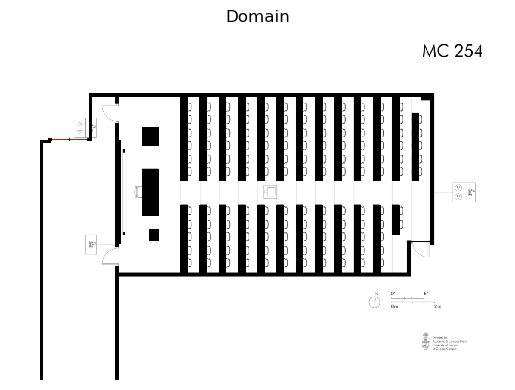

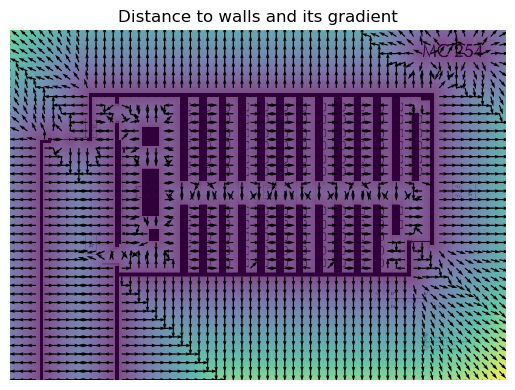

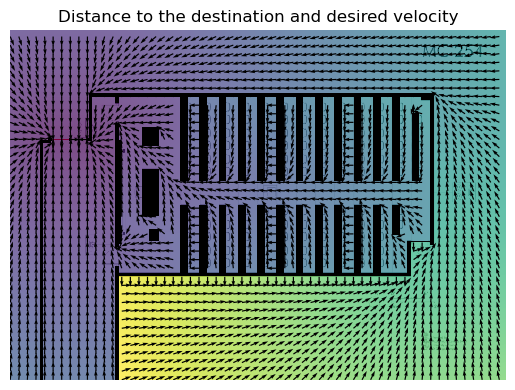

In [4]:
# easier way is probably to just make a drawing elswhere of the room format, then
#    use it here. I'm just gonna practice drawing here
#
# OG Authors:
#     Sylvain Faure <sylvain.faure@universite-paris-saclay.fr>
#     Bertrand Maury <bertrand.maury@universite-paris-saclay.fr>
#
#     cromosim/examples/domain/domain_room.py
#
#     python domain_room.py
#
# License: GPL
# 
# Modified by Jessica Chen

"""
This script allows you to create a very simple domain: a room with a single door.
The layout of the room is given by the image "room.png". Then we add a
door using a red line (Line2D object from Matplotlib) and an obstacle using a
black circle (Circle object from Matplotlib).
"""
from matplotlib.patches import Rectangle

# To create a Domain object from a background image
scale = 2/102 # not sure if necessary but might come in handy later?
dom = Domain(name='MC254hall', background='MC254-hall.png', pixel_size=scale)

# OBJECTS ---------------------------------------

# To define the color for the walls
wall_color = [0, 0, 0]

# lines/rects for walls
#     Line2D(xdata, ydata, linewidth)
#     Rectangle( (anchor_x,anchor_y), width, height, angle=0, rotation_point=0 )
# bottom wall
#line = Line2D([153*scale, (153+674)*scale], [248*scale, (248)*scale], linewidth=2)
rect = Rectangle(((253)*scale, (248-6)*scale), 674*scale, 7*scale)
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)
# left wall
rect = Rectangle(( (244)*scale, 0 ), 8*scale, (22+248-6)*scale) # extend down as the hall
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color) 
rect = Rectangle(((244)*scale, (248-6)*scale), 8*scale, 22*scale)
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)
rect = Rectangle(((244)*scale, (248-6+24+45)*scale), 8*scale, 286*scale)
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)
rect = Rectangle(((244)*scale, (248-6+24+45+288+45)*scale), 8*scale, 21*scale)
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)
# top wall
rect = Rectangle(((153-7+100)*scale, (248-6+24+45+288+45+15)*scale), 742*scale, 8*scale)
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)
rect = Rectangle(((153-7+742-29+100)*scale, (248-6+24+45+288+45+15-8)*scale), 29*scale, 8*scale)
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)
# right wall
rect = Rectangle(((153-7+742-9+100)*scale, (248-6+24+45+288+45+15-8-335)*scale), 9*scale, 335*scale)
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)
rect = Rectangle(((153+673+100)*scale, (248-6)*scale), 8*scale, 82*scale)
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)

# Seats
# - added 5 to block off the tiny gaps near the wall just in case
#   those cause problems
# longer (top row) seats
#     Rectangle( (anchor_x,anchor_y), width, height, angle=0, rotation_point=0 )
for i in range(0, 12):
    rect = Rectangle(((296+(17+28)*i+100)*scale, (463)*scale), 17*scale, (193+5)*scale)
    dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)
rect = Rectangle(((296+(17+28)*12+100)*scale, (463)*scale), 17*scale, 158*scale)
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)
# shorter (bottom row) seats
for i in range(0, 11):
    rect = Rectangle(((296+(17+28)*i+100)*scale, (251-5)*scale), 17*scale, (157+5)*scale)
    dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)
rect = Rectangle(((296+(17+28)*11+100)*scale, (251+87)*scale), (17)*scale, (70)*scale)
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)

# Block off back door
#     Line2D(xdata, ydata, linewidth)
line = Line2D([(153+673+9+100)*scale, (153+673+9+46+100)*scale], [(268+54)*scale, (268+54)*scale], linewidth=2)
dom.add_shape(line, outline_color=wall_color, fill_color=wall_color)

# Other obstacles
#     Rectangle( (anchor_x,anchor_y), width, height, angle=0, rotation_point=0 )
# - chalkboard
rect = Rectangle(((152+100)*scale, (318)*scale), (5)*scale, (240)*scale)
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)
# - podium, desk, and accessible desk up front
rect = Rectangle(((207+100)*scale, (545)*scale), (39)*scale, (43)*scale)
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)
rect = Rectangle(((207+100)*scale, (383)*scale), (39)*scale, (108)*scale)
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)
rect = Rectangle(((225+100)*scale, (323)*scale), (21)*scale, (27)*scale)
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)


# To define the color for the issue of the room
door_color = [255, 0, 0]

# Hallway doors --> destination for group moving out
#     Line2D(xdata, ydata, linewidth)
line = Line2D([(153-7+100-7)*scale-((0.27/693)*341 + 0.75 + (671.9/1591.5)*0.422)+(6*scale)-(75/346)-(4277/5536), (153-7+100-7)*scale-((0.27/693)*341 + 0.75 + (671.9/1591.5)*0.422)+(6*scale)-(75/346)], [(248-6+24+45+288+45+15)*scale-(220/280551)*2546.9+3*scale, (248-6+24+45+288+45+15)*scale-(220/280551)*2546.9+3*scale], linewidth=2)
dom.add_shape(line, outline_color=door_color, fill_color=door_color)
# not sure if 2 destinations works like this
line = Line2D([(153-7+100-7)*scale-((0.27/693)*341 + 0.75 + (671.9/1591.5)*0.422)+(6*scale)-(75/346)-2*(4277/5536)-(35/692), (153-7+100-7)*scale-((0.27/693)*341 + 0.75 + (671.9/1591.5)*0.422)+(6*scale)-(75/346)-(4277/5536)-(35/692)], [(248-6+24+45+288+45+15)*scale-(220/280551)*2546.9+3*scale, (248-6+24+45+288+45+15)*scale-(220/280551)*2546.9+3*scale], linewidth=2)
dom.add_shape(line, outline_color=door_color, fill_color=door_color)

# build the hall ~~~~~
#     Rectangle( (anchor_x,anchor_y), width, height, angle=0, rotation_point=0 )

# nook thing top wall
rect = Rectangle(((153-7+100)*scale-((0.27/693)*341 + 0.75 + (671.9/1591.5)*0.422), (248-6+24+45+288+45+15)*scale), ((0.27/693)*341 + 0.75 + (671.9/1591.5)*0.422), 8*scale)
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)
# nook thing side wall
rect = Rectangle(((153-7+100-7)*scale-((0.27/693)*341 + 0.75 + (671.9/1591.5)*0.422), (248-6+24+45+288+45+15)*scale-(220/280551)*2546.9), 6*scale, (220/280551)*2546.9+8*scale)
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)

# wall with the hallway doors
# right columns
rect = Rectangle(((153-7+100-7)*scale-((0.27/693)*341 + 0.75 + (671.9/1591.5)*0.422)+(6*scale)-(75/346), (248-6+24+45+288+45+15)*scale-(220/280551)*2546.9), 75/346, 6*scale)
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)
# middle column
rect = Rectangle(( (153-7+100-7)*scale-((0.27/693)*341 + 0.75 + (671.9/1591.5)*0.422)+(6*scale)-(75/346)-(4277/5536)-(35/692), (248-6+24+45+288+45+15)*scale-(220/280551)*2546.9), 35/692, 6*scale)
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)
# left corner thing
rect = Rectangle(( 239*scale-((0.27/693)*341 + 0.75 + (671.9/1591.5)*0.422)+(6*scale)-(75/346)-2*(4277/5536)-(35/692)-(105/1384), (248-6+24+45+288+45+15)*scale-(220/280551)*2546.9), 105/1384, 6*scale)
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)
rect = Rectangle(( 239*scale-((0.27/693)*341 + 0.75 + (671.9/1591.5)*0.422)+(6*scale)-(75/346)-2*(4277/5536)-(35/692)-(105/1384)-6*scale, (248-6+24+45+288+45+15)*scale-(220/280551)*2546.9-15/173 ), 6*scale, 15/173+6*scale)
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)

# last bit until end of hall
rect = Rectangle(( (244)*scale-1143/350, (248-6+24+45+288+45+15)*scale-(220/280551)*2546.9-15/173 ), 14*scale, 6*scale)
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)
# extend to bottom of image
rect = Rectangle(( (244)*scale-1143/350-6*scale, 0 ), 6*scale, 559*scale)
dom.add_shape(rect, outline_color=wall_color, fill_color=wall_color)

# ~~~~


# PUT IT ALL TOGETHER ---------------------------------------

# To build the domain :
dom.build_domain()

# To plot the domain : backgroud + added shapes
dom.plot(id=1, title="Domain")

# To create a Destination object towards the door
dest = Destination(name='door', colors=[door_color],
                   excluded_colors=[wall_color])
dom.add_destination(dest)

# To plot the wall distance and its gradient
dom.plot_wall_dist(id=2, step=20,
                   title="Distance to walls and its gradient",
                   savefig=False, filename="mc254_wall_distance.png")

# To plot the distance to the red door and the correspondant
# desired velocity
dom.plot_desired_velocity('door', id=3, step=20,
                          title="Distance to the destination and desired velocity",
                          savefig=False, filename="mc254_desired_velocity.png")

print("===> Domain: ", dom)

plt.show()

Looks good! Now to convert it to make a json file from it and load that to make sure it shows the same thing.